In [1]:
import pandas as pd

In [4]:
# %%time은 아래 코드가 실행완료 될때까지의 소요시간을 나타냄(주피터 노트북 한정)
%%time
for i in range(10000):
    pass

Wall time: 999 µs


In [5]:
# %%writefile 파일명 은 현재 디렉토리에 파일을 만들 수 있다.
%%writefile test.txt
테스트 입니다.

Writing test.txt


In [9]:
with open('test.txt','r', encoding='utf8') as f :
    print(f.read())

테스트 입니다.



In [10]:
%%writefile sample.csv
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing sample.csv


In [11]:
contents = '''
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three 
'''
with open('sample1_1.csv','w') as f :
    f.write(contents)

In [14]:
pd.read_csv('sample.csv')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [15]:
# index_col 을 사용하면 지정한 컬럼으로 인덱스 설정가능
pd.read_csv('sample.csv', index_col='c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [17]:
# 파일을 불러오고 나서 set_index로 인덱스 설정가능
df1 = pd.read_csv('sample.csv')
df1.set_index('c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [20]:
%%writefile sample1_2.txt
c1/ c2/ c3
1/ 1.11/ one
2/ 2.22/ two
3/ 3.33/ three 

Overwriting sample1_2.txt


In [21]:
# txt 파일이어도 read_csv로 구분자 넣어서 불러 올 수 있음
pd.read_csv('sample1_2.txt',sep='/')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [23]:
# csv파일을 가져올때 컬럼명을 변경하고 싶다면 name으로 컬럼명 설정, skiprow로 컬럼명에 해당하는 row무시
pd.read_csv('sample.csv', names=['d1','d2','d3'], skiprows=[0])

,d1,d2,d3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [24]:
%%writefile sample1_4.csv
c1, c2, c3
1, 1.11, error
2, error, two
3, error, three

Writing sample1_4.csv


In [32]:
sample1_4 = pd.read_csv('sample1_4.csv', na_values=['error'])
sample1_4

,c1,c2,c3
0,1,1.11,error
1,2,error,two
2,3,error,three


In [33]:
# 집 값 csv
hp_df = pd.read_csv('house_prices.csv')

In [35]:
hp_df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [36]:
hp_df.tail()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
6023,4373,B,757,0,0,lodge,385420
6024,4422,C,3540,5,3,victorian,890627
6025,5894,B,1518,2,1,lodge,760829
6026,5591,C,2270,4,2,ranch,575515
6027,6211,C,3355,5,3,victorian,844747


In [40]:
import pandas_datareader as web
import datetime

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2022, 12,31)
gdp = web.DataReader('GDP','fred', start, end)

In [41]:
gdp

,GDP
DATE,
2015-01-01,17991.348
2015-04-01,18193.707
2015-07-01,18306.960
2015-10-01,18332.079
2016-01-01,18425.306
2016-04-01,18611.617
2016-07-01,18775.459
2016-10-01,18968.041
2017-01-01,19148.194


<AxesSubplot:xlabel='DATE'>

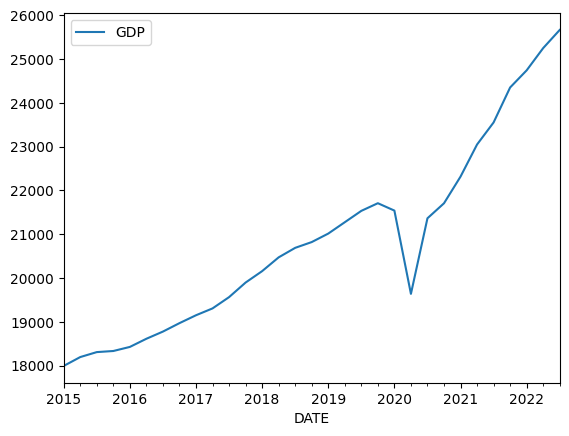

In [42]:
gdp.plot()